In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [5]:
df1 = pd.read_csv('time_series_covid_19_confirmed.csv')
df1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,...,86,87,90,90,90,90,91,91,91,91


## Preprocessing

In [6]:
df2 = df1.drop(['Lat', 'Long'], axis=1)
lables = df2.columns.values

# Getting China
df3 = df2.groupby('Country/Region')
china = df3.get_group('Mainland China')#.values
china
china_sorted = china.sort_values('2/20/20', axis=0, ascending=False).values

top_seven_state = []
rest_of_china = 0
wuhan = 0
for index, state in enumerate(china_sorted):
    if index < 7:
        top_seven_state.append(state)
        rest_of_china += state[-1]
        
    if index == 0:
        wuhan = state[-1]


## Line Graph

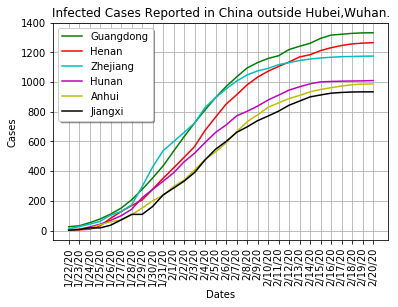

<Figure size 432x288 with 0 Axes>

In [7]:
colors = ['b', 'g','r','c','m','y','k']


fig, ax = plt.subplots()

for index, state in enumerate(top_seven_state):
    
    if state[0] == 'Hubei':
        pass
    else:
        ax.plot(lables[2:], state[2:], colors[index], label=state[0])

plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Dates')
plt.ylabel('Cases')

plt.title('Infected Cases Reported in China outside Hubei,Wuhan.')
legend = ax.legend(loc='best', shadow=True)
plt.show()

fig.savefig('outside_wuhan.png', bbox_inches = 'tight')
plt.clf()



## Pie Chart

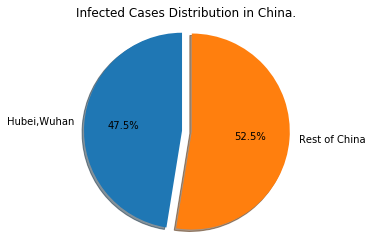

<Figure size 432x288 with 0 Axes>

In [11]:
# Pie Chart for Infected Cases Distribution in China.

size_of_wuhan = (wuhan/(wuhan+rest_of_china))*100
size_of_rest_of_china = (rest_of_china/(wuhan+rest_of_china))*100

labels = ['Hubei,Wuhan', 'Rest of China']
sizes = [size_of_wuhan, size_of_rest_of_china]
explode = (0.1, 0) 


fig1, ax1 = plt.subplots()
plt.title('Infected Cases Distribution in China.')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
                                        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()
fig1.savefig('infected_cases_pie_chart.png', bbox_inches = 'tight')
plt.clf()

In [12]:
whole_array = df1.values
mainland_china = 0
rest_of_the_world = 0

for index, row in enumerate(whole_array):
    if row[1] == 'Mainland China':
        mainland_china += row[-1]
        
    else:
        rest_of_the_world += row[-1]


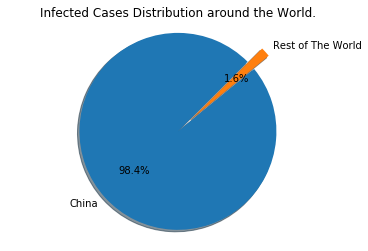

<Figure size 432x288 with 0 Axes>

In [13]:
# Pie Chart for Infected Cases Distribution around the World.

size_of_china = (mainland_china/(mainland_china + rest_of_the_world))*100
size_of_rest_of_world = (rest_of_the_world/(mainland_china + rest_of_the_world))*100

labels = ['China', 'Rest of The World']
sizes = [size_of_china, size_of_rest_of_world]
explode = (0.2, 0) 


fig1, ax1 = plt.subplots()
plt.title('Infected Cases Distribution around the World.')
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  

plt.show()
fig1.savefig('infected_cases_pie_chart2.png', bbox_inches = 'tight')
plt.clf()

In [14]:
# Soring

other_countries = []
for index, row in enumerate(whole_array):
    if row[1] == 'Mainland China':
        pass
        
    else:
        other_countries.append(row)
        
df_final = pd.DataFrame(other_countries)
final_array = df_final.sort_values(33, axis=0, ascending=False).values

In [15]:
conclusive_dict = {}
conclusive_dict_count = 0
for index, row in enumerate(final_array):
    if row[1] == 'Others':
        pass
    
    elif row[-1] < 15:
        if "Others" in conclusive_dict:
            conclusive_dict_count += row[-1]
            temp = row[-1] + conclusive_dict["Others"]
            conclusive_dict["Others"] = temp
        else:
            conclusive_dict_count += row[-1]
            conclusive_dict["Others"] = row[-1]
    
    elif row[1] in conclusive_dict:
        conclusive_dict_count += row[-1]
        temp = row[-1] + conclusive_dict[row[1]]
        conclusive_dict[row[1]] = temp
    else:
        conclusive_dict_count += row[-1]
        conclusive_dict[row[1]] = row[-1]
        
print(conclusive_dict)
print(len(conclusive_dict))

{'Germany': 16, 'Hong Kong': 68, 'Thailand': 35, 'South Korea': 104, 'Malaysia': 22, 'Japan': 94, 'Vietnam': 16, 'Taiwan': 24, 'Singapore': 84, 'Others': 103}
10


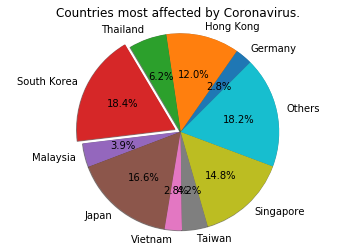

<Figure size 432x288 with 0 Axes>

In [19]:
# Pie Chart for Countries most affected by Coronavirus.

labels = []
sizes = []


def get_percentage(obtain, total):
    
    return (obtain/total)*100

for key, value in conclusive_dict.items():
    labels.append(key)
    sizes.append(get_percentage(value, conclusive_dict_count))
explode = ( 0, 0, 0, 0.3, 0, 0, 0, 0, 0, 0) 


fig2, ax2 = plt.subplots()
plt.title('Countries most affected by Coronavirus.')
ax2.pie(sizes, explode=explode, radius=5, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig2.savefig('infected_cases_pie_chart3.png', bbox_inches = 'tight')
plt.clf()